In [1]:
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv(r'CombinedDataMentalhealth.csv')
data

Saving CombinedDataMentalhealth.csv to CombinedDataMentalhealth (1).csv


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [5]:
value_status = data.status.value_counts().reset_index()
value_status.columns = ['Mental Condition', 'Values']

<ipython-input-6-2038849ee60a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mental Condition', y='Values', data=value_status, palette='viridis')


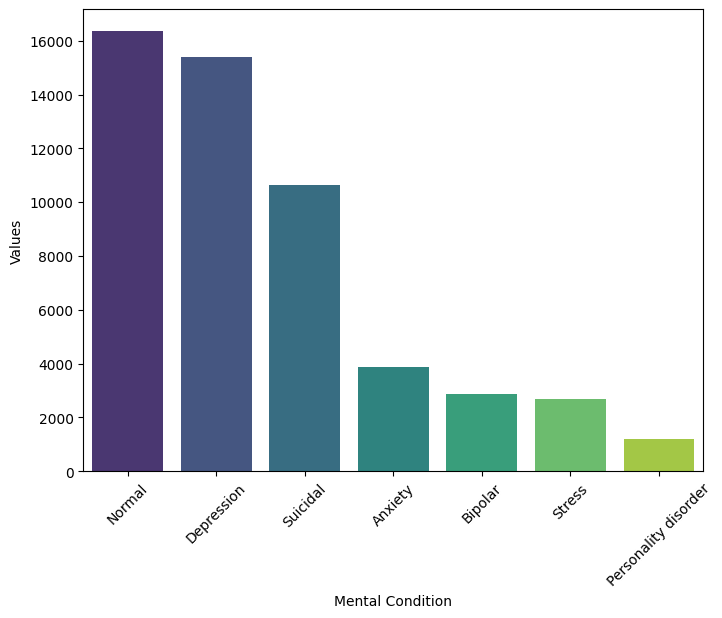

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x='Mental Condition', y='Values', data=value_status, palette='viridis')

plt.xlabel('Mental Condition')
plt.xticks(rotation=45)
plt.ylabel('Values')

plt.show()

In [7]:
data = data.drop(columns='Unnamed: 0')

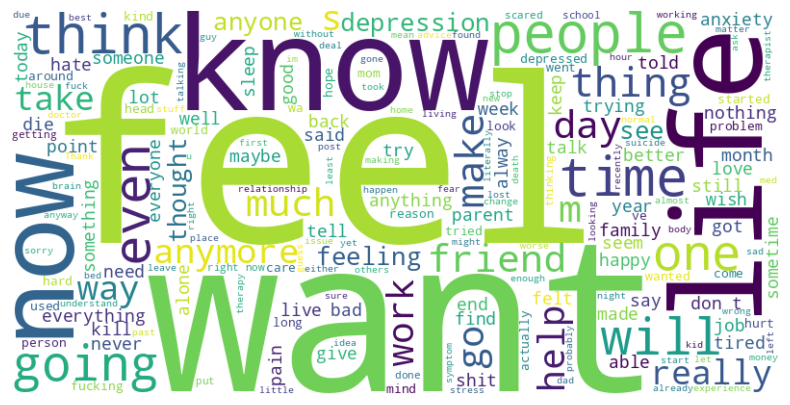

In [8]:
from wordcloud import WordCloud

data['statement'] = data['statement'].astype(str)
text =" ".join(data.statement)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

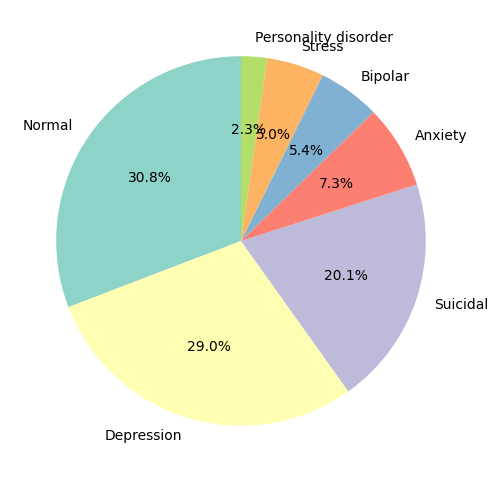

In [9]:
plt.figure(figsize=(6, 6))
colors = sns.color_palette("Set3", n_colors=len(value_status))
plt.pie(value_status['Values'], labels=value_status['Mental Condition'], autopct="%1.1f%%", startangle=90, colors=colors)

plt.show()

In [10]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from transformers import DistilBertTokenizer
import re

data['statement'] = data['statement'].apply(lambda x : re.sub(r'(@\w+|\d+|[^\w\s])', '', x).lower().strip())
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def remove_stepwords(tokens):
    words = [word for word in tokens if word.lower() not in ENGLISH_STOP_WORDS and word.isalpha()]

    return words

def tokenize_and_stepwords(text):
    tokens = tokenizer.tokenize(text)

    filltered_tokens = remove_stepwords(tokens)
    return filltered_tokens
data['tokens'] = data.statement.apply(tokenize_and_stepwords)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [11]:
def convert_tokens_to_ids(tokens):
    return tokenizer.convert_tokens_to_ids(tokens)

data['token_ids'] = data['tokens'].apply(convert_tokens_to_ids)

In [12]:
data.dtypes

,0
statement,object
status,object
tokens,object
token_ids,object


In [13]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import FreqDist, bigrams

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

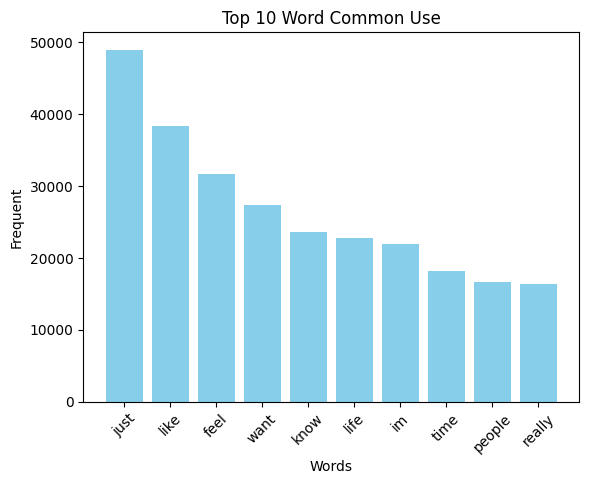

In [15]:
all_words = [word for token in data.tokens for word in token ]

word_count = Counter(all_words)

most_commond_word_use = word_count.most_common(10)

words, freq = zip(*most_commond_word_use)

plt.bar(words, freq, color= "skyblue")
plt.title("Top 10 Word Common Use")
plt.xlabel("Words")
plt.ylabel("Frequent")
plt.xticks(rotation=45)

plt.show()

<ipython-input-16-5264f1c1c985>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigrams, y=freq, palette='Blues_d')


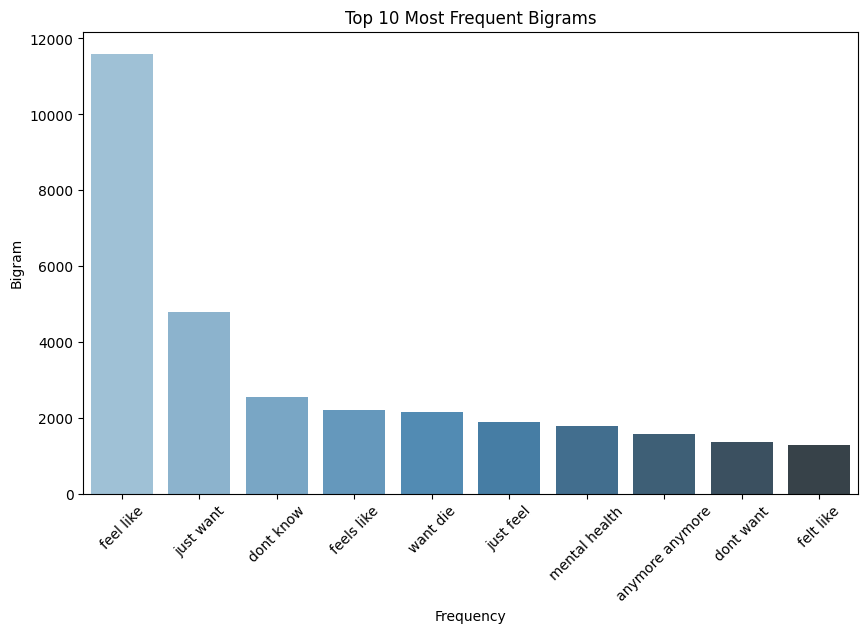

In [16]:
cvectorizer = CountVectorizer(ngram_range=(2, 2), stop_words="english")

X = cvectorizer.fit_transform(data.statement)
bigrams = X.sum(axis=0).A1

bigrams_dict = dict(zip(cvectorizer.get_feature_names_out(), bigrams))

sorted_bigrams = sorted(bigrams_dict.items(), key= lambda x : x[1], reverse=True)

bigrams, freq = zip(*sorted_bigrams[:10])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=bigrams, y=freq, palette='Blues_d')
plt.title("Top 10 Most Frequent Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.xticks(rotation = 45)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['status_encoder'] = label_encoder.fit_transform(data.status)
data.status_encoder.value_counts().reset_index()

,status_encoder,count
0,3,16351
1,2,15404
2,6,10653
3,0,3888
4,1,2877
5,5,2669
6,4,1201


In [18]:
data[['status','status_encoder']].value_counts().reset_index()

,status,status_encoder,count
0,Normal,3,16351
1,Depression,2,15404
2,Suicidal,6,10653
3,Anxiety,0,3888
4,Bipolar,1,2877
5,Stress,5,2669
6,Personality disorder,4,1201


In [24]:
import onnx
import onnxruntime as ort
from datasets import Dataset
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, pipeline, AdamWeightDecay
import torch
import accelerate

In [25]:
def tokenize_function(examples):
    return tokenizer(examples['statement'], padding='max_length', truncation=True)

train_dataset = Dataset.from_pandas(data[['statement', 'status_encoder']])
train_dataset = train_dataset.map(tokenize_function, batched=True)
train_dataset = train_dataset.rename_column("status_encoder", "labels")


Map:   0%|          | 0/53043 [00:00<?, ? examples/s]

In [26]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 7)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy= 'epoch',
    learning_rate= 2e-5,
    per_device_eval_batch_size= 16,
    num_train_epochs= 3,
    weight_decay= 0.01,
    evaluation_strategy="no",
    remove_unused_columns=False,
    report_to="none"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [31]:
from sklearn.metrics import accuracy_score
import numpy as np

In [32]:
def compute_score(p):
    preds, labels = p
    preds = np.argmax(preds, axis=1)
    return accuracy_score(labels, preds)

In [35]:
trainer = Trainer(
    model= model,
    args= training_args,
    train_dataset = train_dataset,
    compute_metrics=compute_score
)

trainer.train()

Step,Training Loss
500,1.061000
1000,0.768500
1500,0.650800
2000,0.618000
2500,0.561100
3000,0.561000
3500,0.530700
4000,0.524800
4500,0.524500
5000,0.488400


TrainOutput(global_step=19893, training_loss=0.4352675922938208, metrics={'train_runtime': 2822.4975, 'train_samples_per_second': 56.379, 'train_steps_per_second': 7.048, 'total_flos': 2.1081284287017984e+16, 'train_loss': 0.4352675922938208, 'epoch': 3.0})

In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [44]:
text = 'I feel so numb and i afraid to avoident. so anxious'
inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
inputs = {key: value.to(device) for key, value in inputs.items()}

In [40]:
import torch

In [46]:
onnx_filename = 'distilbert_sentiment.onnx'
torch.onnx.export(
    model,
    (inputs['input_ids'], inputs['attention_mask']),
    onnx_filename,
    input_names=['input_ids', 'attention_mask'],
    output_names=['logits'],
     dynamic_axes={
        'input_ids': {0: 'batch_size', 1: 'sequence_length'},
        'attention_mask': {0: 'batch_size', 1: 'sequence_length'},
        'logits': {0: 'batch_size', 1: 'num_labels'}
    },
    opset_version=14
)

print(f"Model successfully converted to ONNX and saved to {onnx_filename}")

Model successfully converted to ONNX and saved to distilbert_sentiment.onnx


In [47]:
import onnxruntime
import numpy as np

In [51]:
onnx_session = onnxruntime.InferenceSession(onnx_filename, providers=['CUDAExecutionProvider'])
onnx_inputs = {
    'input_ids': inputs['input_ids'].cpu().numpy(),
    'attention_mask': inputs['attention_mask'].cpu().numpy()
}

/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [52]:
onnx_outputs = onnx_session.run(None, onnx_inputs)

In [53]:
logits = onnx_outputs[0]

In [54]:
probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

In [55]:
predicted_class = np.argmax(probs, axis=1)

In [59]:
predicted_label = label_encoder.inverse_transform([predicted_class])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
print(f"Predicted class index: {predicted_class}")
print(f"Predicted label: {predicted_label[0]}")
print(f"Probabilities: {probs}")

Predicted class index: [0]
Predicted label: Anxiety
Probabilities: [[9.9418604e-01 2.5149607e-04 2.6644228e-03 5.5963785e-04 3.6135787e-04
  1.6941512e-03 2.8281225e-04]]


In [63]:
outputs = model(**inputs)
logits = outputs.logits

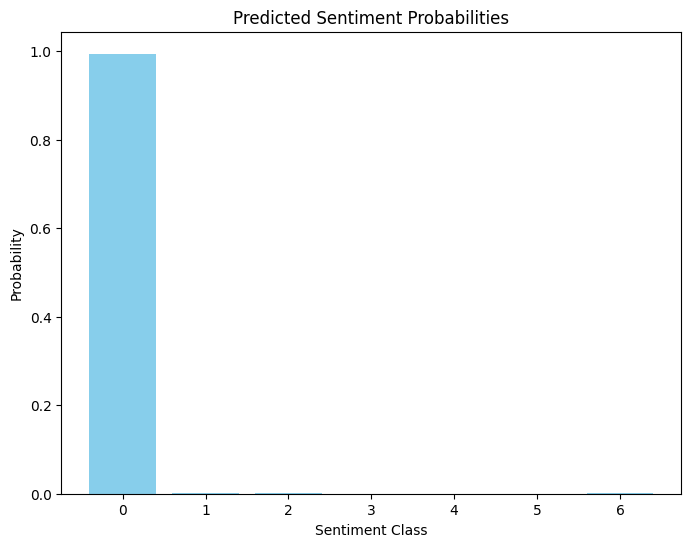

In [64]:
plt.figure(figsize=(8, 6))
plt.bar(data.status_encoder.unique(), probs[0], color='skyblue')
plt.title('Predicted Sentiment Probabilities')
plt.ylabel('Probability')
plt.xlabel('Sentiment Class')
plt.show()

In [66]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

with torch.no_grad():
    outputs = model.base_model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)

n_components = min(50, embeddings.shape[1])
pca = PCA(n_components)
reduced_embeddings = pca.fit_transform(embeddings.cpu().numpy())
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(reduced_embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (tsne_results[i, 0], tsne_results[i, 1]))

plt.title('t-SNE Visualization of DistilBERT Embeddings')
plt.show()

ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [67]:
print(embeddings.shape)

torch.Size([1, 768])
